
## Problem 1: Image Blending
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html#image-arithmetics


In [5]:
import numpy as np
import pandas as pd
import cv2 as cv  # import opencv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

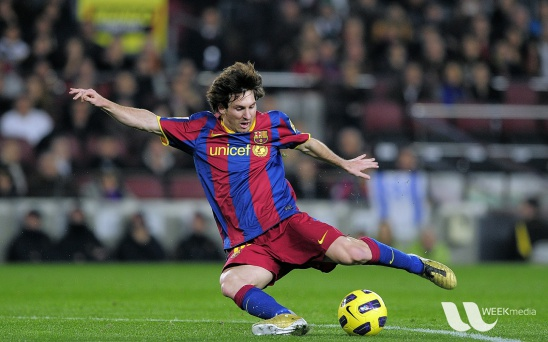

In [7]:
img1=cv.imread('/content/download.png')
cv2_imshow(img1)

In [9]:
img1.shape
# Three values of R, G and B are stored at a (height,width)

(342, 548, 3)

In [11]:
img1[200,200]
# For e.g here at (100,100) r=157, g=166, b=200

array([117, 116, 120], dtype=uint8)

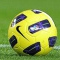

In [14]:
# we can do photoshop although not that good :)
ball=img1[280:340,330:390]
cv2_imshow(ball)

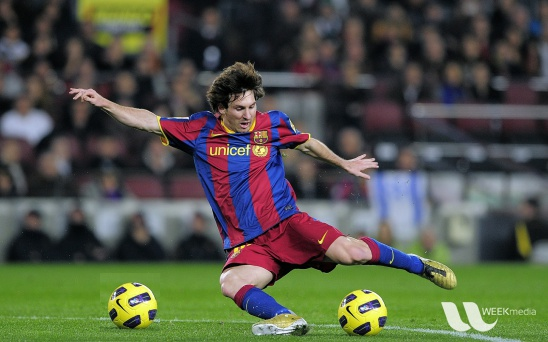

In [16]:
img1[273:333, 100:160] = ball
cv2_imshow(img1)

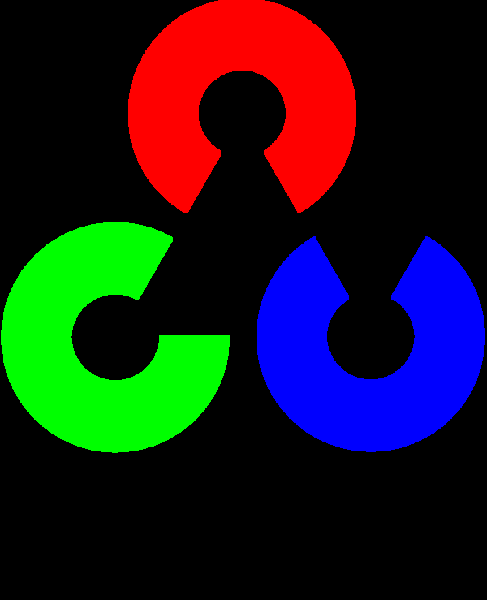

In [20]:
img2 = cv.imread('/content/487px-OpenCV_Logo_with_text.png')
cv2_imshow(img2)

In [21]:
print(img2.shape)

(600, 487, 3)


In [22]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0) # Needs to be resized !!

NameError: ignored

(342, 548, 3)


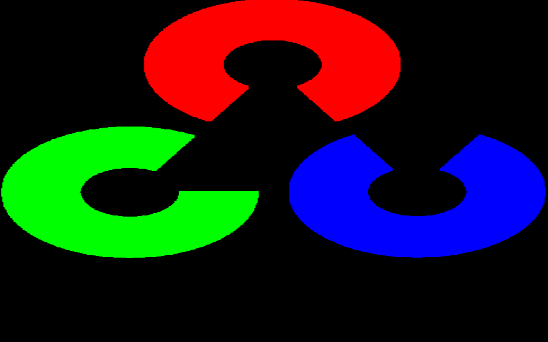

In [23]:
img2a=cv.resize(img2,(548,342))
print(img2a.shape)
cv2_imshow(img2a)

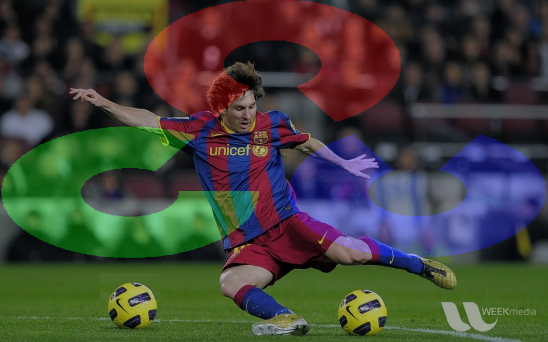

In [24]:
dst = cv.addWeighted(img1,0.7,img2a,0.3,0)
cv2_imshow(dst)

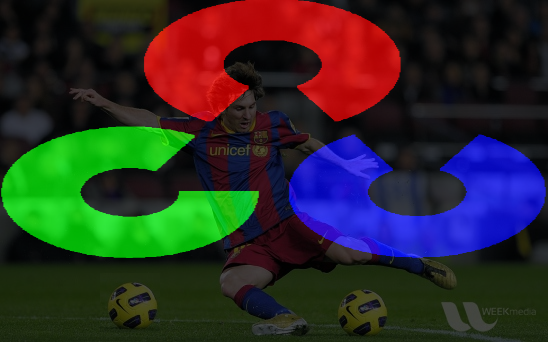

In [27]:
dst = cv.addWeighted(img1,0.3,img2a,0.7,0)
cv2_imshow(dst)

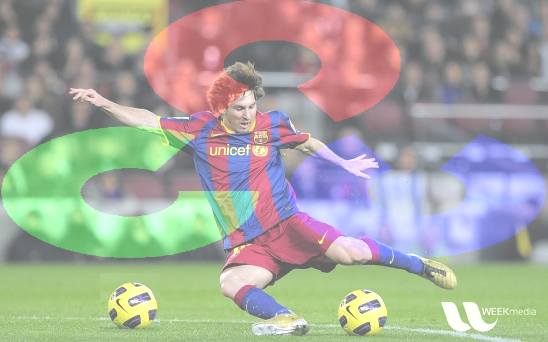

In [28]:
dst = cv.addWeighted(img1,0.7,img2a,0.3,100)
cv2_imshow(dst)

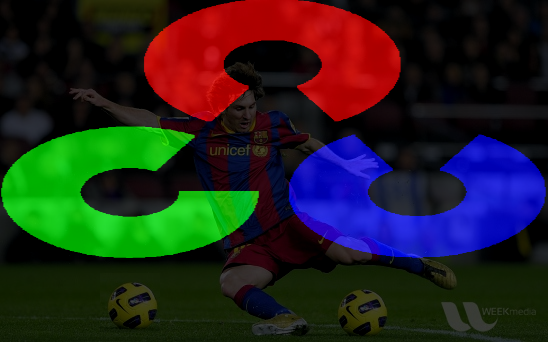

In [30]:
dst = cv.addWeighted(img1,0.3,img2a,0.7,-10) #The third argument -100 is basically determining the darkeness and brightness
cv2_imshow(dst)

## Problem 2: Detect new items/people in a surveillance video

- Video: Sequence of images typically at 24 FPS or 30 FPS
- Simplest way to detect items/people: Subtraction
- More complex ML model based systems also exist

In [31]:
! wget https://github.com/opencv/opencv/blob/master/samples/data/vtest.avi

--2021-06-22 13:34:05--  https://github.com/opencv/opencv/blob/master/samples/data/vtest.avi
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘vtest.avi’

vtest.avi               [ <=>                ] 103.60K  --.-KB/s    in 0.04s   

2021-06-22 13:34:05 (2.78 MB/s) - ‘vtest.avi’ saved [106082]



In [32]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('vtest.avi')
print(cap)
ret, frame = cap.read()
print(ret)
print(frame.shape)
cv2_imshow(frame)

cap.release()

<VideoCapture 0x7fb165ca5b70>
False


AttributeError: ignored

In [33]:
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RfcoodYTKdcWbiZYmvIARpPZJansboay' -O vtest.mp4

--2021-06-22 13:37:27--  https://docs.google.com/uc?export=download&id=1RfcoodYTKdcWbiZYmvIARpPZJansboay
Resolving docs.google.com (docs.google.com)... 173.194.217.100, 173.194.217.102, 173.194.217.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k38neqlvr11mal58fgmajf6hiu4kr877/1624368975000/06629147635963609455/*/1RfcoodYTKdcWbiZYmvIARpPZJansboay?e=download [following]
--2021-06-22 13:37:28--  https://doc-0s-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k38neqlvr11mal58fgmajf6hiu4kr877/1624368975000/06629147635963609455/*/1RfcoodYTKdcWbiZYmvIARpPZJansboay?e=download
Resolving doc-0s-1o-docs.googleusercontent.com (doc-0s-1o-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connecting to doc-0s-1o-docs.googleusercontent.com (doc-0s-

<VideoCapture 0x7fb165c077b0>
True
(576, 768, 3)


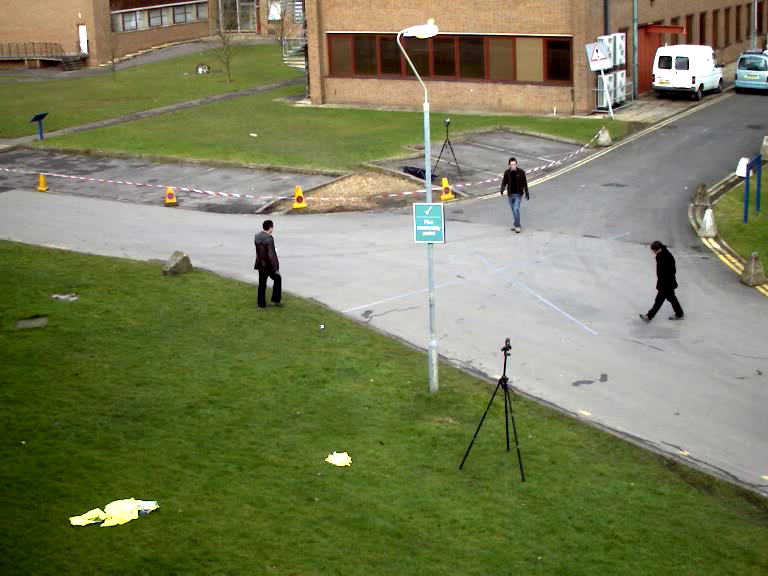

In [34]:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_video/py_bg_subtraction/py_bg_subtraction.html
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('vtest.mp4')
print(cap)
ret, frame = cap.read()
print(ret)
print(frame.shape)
cv2_imshow(frame)

cap.release()

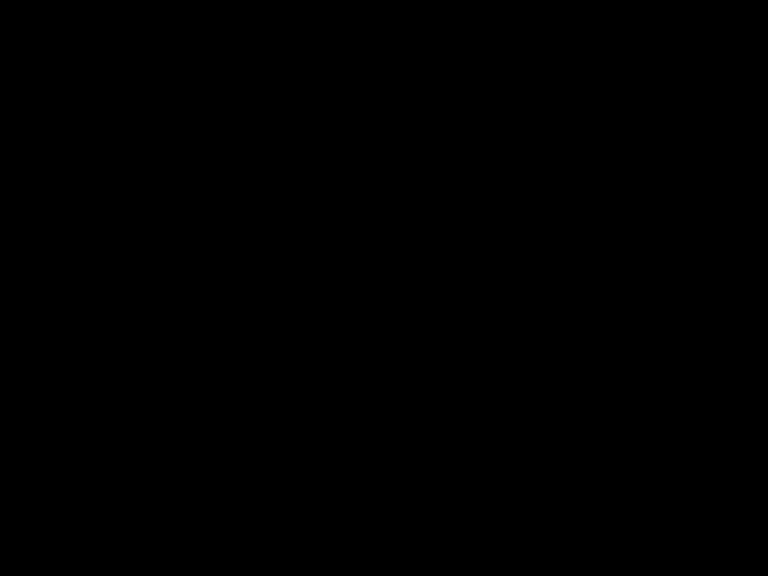

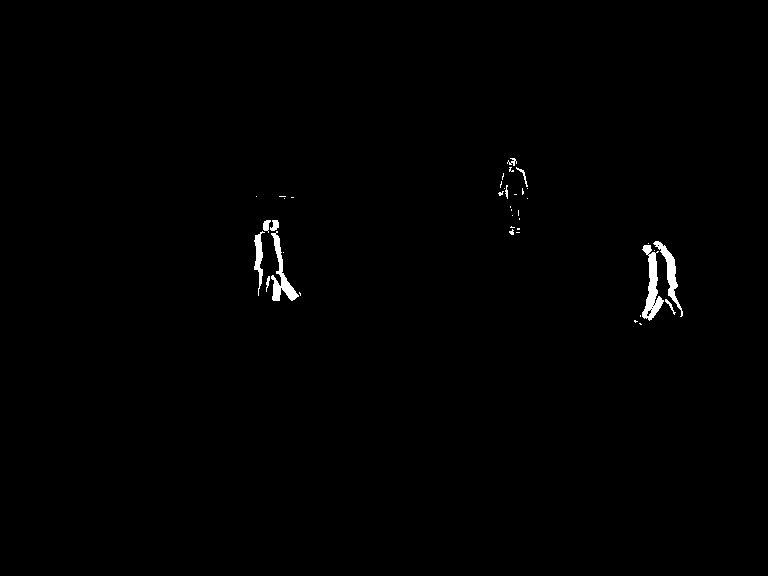

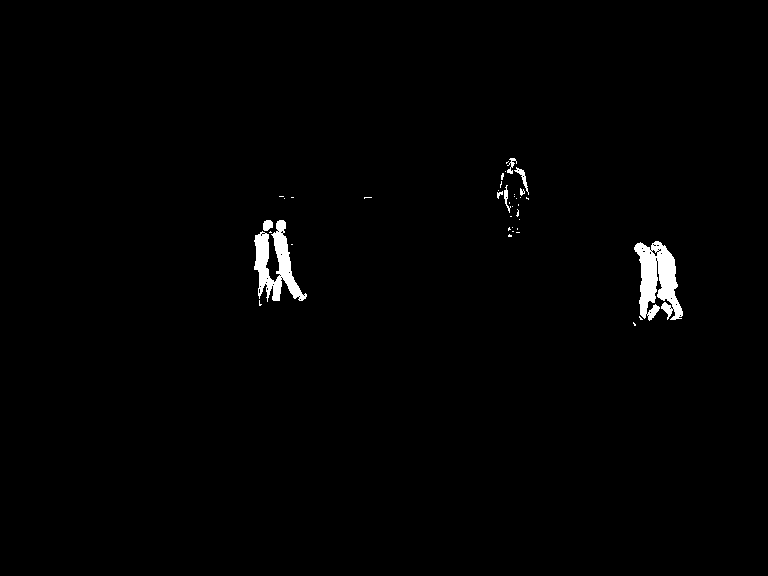

In [35]:
import numpy as np
import cv2

cap = cv2.VideoCapture('vtest.mp4')

#Refer documentation: https://docs.opencv.org/3.4/d6/da7/classcv_1_1bgsegm_1_1BackgroundSubtractorMOG.html
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

cnt =0 

while(cnt < 3):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2_imshow(fgmask)
    cnt = cnt+1

cap.release()
cv2.destroyAllWindows()